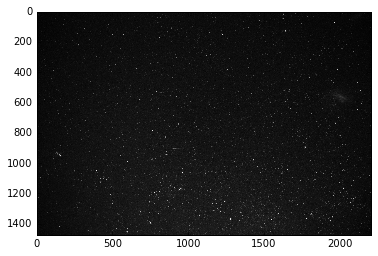

In [24]:
%matplotlib inline

from skimage import data
from skimage import color 
from skimage.transform import rescale
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
import numpy as np

from skimage.exposure import rescale_intensity

from IPython.display import Image
import matplotlib.pyplot as plt

raw_image = data.imread('../data/astrosmall00_mobile/none/00_2015-12-14_124659_DSC_3316.thumb.jpg')
# raw_image = data.imread('../data/astrosmall00_mobile/meteors/00_2015-12-14_135753_DSC_3564.thumb.jpg')
# raw_image = data.imread('../data/astrosmall00_mobile/meteors/00_2015-12-14_141008_DSC_3613.thumb.jpg')
# raw_image = data.imread('../data/astrosmall00_mobile/meteors/00_2015-12-14_144308_DSC_3745.thumb.jpg')
# raw_image = data.imread('../data/astrosmall00_mobile/meteors/00_2015-12-14_145956_DSC_3804.thumb.jpg')


# Data pre-processing

# Reduce the image size
raw_image = rescale(raw_image, .3)

# Reduce resolution from 300x300 dpi to 70x70dpi

# Convert the RGB image to gray scale
image = color.rgb2gray(raw_image)

plt.imshow(image, cmap=plt.cm.gray)
# print "Colored image shape:\n", raw_image.shape
# print "Grayscale image shape:\n", image.shape

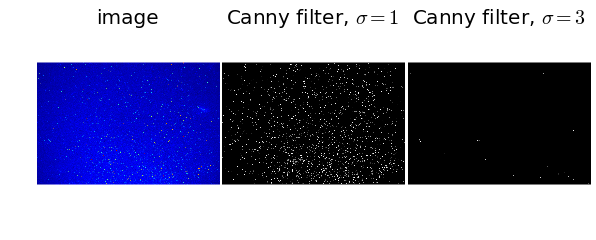

In [25]:
from skimage import feature

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(image)
edges2 = feature.canny(image, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

from skimage import io

io.imsave('test.jpg', image)


plt.show()

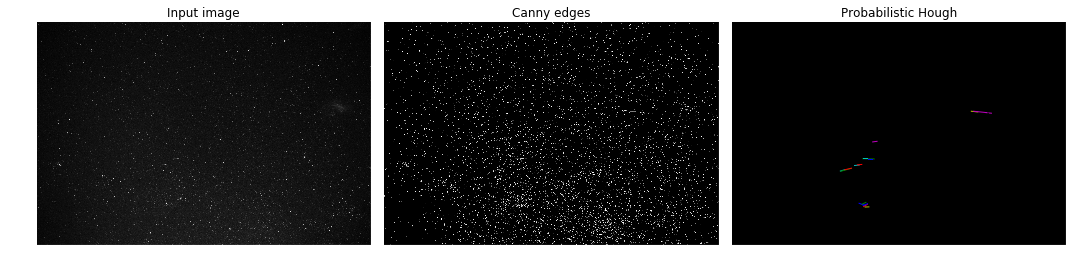

In [37]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

# Line finding using the Probabilistic Hough Transform
edges = canny(image)
lines = probabilistic_hough_line(edges, threshold=5, line_length=25,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0, cmap=cm.gray)
for line in lines:
#     print line
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()
    a.set_adjustable('box-forced')

plt.tight_layout()
plt.show()